KNN & PCA ASSIGNMENT

1. What is K-Nearest Neighbors (KNN) and how does it work in both
classification and regression problems?
- K-Nearest Neighbor(KNN) Algorithm is a supervised learning algorithm used for both classification and regression by finding the 'k' closest data points to a new data point.
- For classification it take the majority class.
- For regression it takes the average value to make the prediction.


2. What is the Curse of Dimensionality and how does it affect KNN
performance?
- The Curse of Dimensionality describes how high-dimensional data (data with many features) becomes difficult for algorithms to find meaningful patterns and increasing computational costs.
- COD (Curse of Dimensionality) affects KNN in following ways:
  - Data Sparsity > Data points became very far.
  - Diluted Distant Metric > Data point begin to appear equidistant from each other.
  - Increased Data Requirements > Large data for training and reliable predictions.
  - Overfitting > Sensitive to noise and irrelevant data.
  - Computational Complexity > Takes more time and makes algorithm slower.

3. What is Principal Component Analysis (PCA)? How is it different from feature selection?
- Principal Component Analysis (PCA) is a feature extraction technique that reduces dimensionality by creating new, uncorrelated features from combinations of the original features to capture the most variance in the data.
- Feature selection reduces dimensionality by selecting a subset of the most relevant original features and discarding the rest.
- The key difference is that PCA transforms features into new ones, while feature selection retains the original features.

4. What are eigenvalues and eigenvectors in PCA, and why are they
important?
- Eigenvalues are the magnitude of the variance along the corresponding eigenvector directions.
- Eigenvalues and eigenvectors are important because they help identify the most significant patterns in the data.
- It allows for dimensionality reduction by focusing on the components that explain the most variation, thereby simplifying datasets without losing crucial information.

5. How do KNN and PCA complement each other when applied in a single pipeline?
- PCA complements KNN by reducing high-dimensional data into a lower-dimensional space, which enhances KNN's computational efficiency and performance by minimizing noise, reducing the curse of dimensionality.
- This dimensional reduction helps KNN focus on the most important information, leading to faster predictions and potentially higher accuracy, especially in datasets with many features.

6. Train a KNN Classifier on the Wine dataset with and without feature scaling. Compare model accuracy in both cases.

In [3]:
#load dataset
from sklearn.datasets import load_wine
wine = load_wine()
x, y = wine.data, wine.target

In [5]:
#train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y,
                            test_size=0.3, random_state=42, stratify=y)

In [6]:
#KNN without feature scaling
from sklearn.neighbors import KNeighborsClassifier
knn_not_scaled = KNeighborsClassifier(n_neighbors=5)
knn_not_scaled

KNeighborsClassifier()

In [7]:
#fit the model
knn_not_scaled.fit(X_train, y_train)

KNeighborsClassifier()

In [9]:
#prediction and accuracy
from sklearn.metrics import accuracy_score
y_pred = knn_not_scaled.predict(X_test)
acc_not_scaled = accuracy_score(y_test, y_pred)

In [10]:
#KNN with feature scaling (Standardization)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
knn_scaled = KNeighborsClassifier(n_neighbors=5)
knn_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = knn_scaled.predict(X_test_scaled)
acc_scaled = accuracy_score(y_test, y_pred_scaled)

In [15]:
#print accuracy
print(f"Accuracy without feature scaling: {acc_not_scaled}")
print(f"Accuracy with feature scaling: {acc_scaled}")

Accuracy without feature scaling: 0.7222222222222222
Accuracy with feature scaling: 0.9444444444444444


7. Train a PCA model on the Wine dataset and print the explained variance ratio of each principal component.

In [16]:
#load dataset
from sklearn.datasets import load_wine
wine = load_wine()

In [17]:
#Standardize features before PCA
from sklearn.preprocessing import StandardScaler
x, y = wine.data, wine.target
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [18]:
#apply PCA (Keep all components)
from sklearn.decomposition import PCA
pca = PCA()
x_pca = pca.fit_transform(x_scaled)

In [19]:
#print explained variance
explained_variance = pca.explained_variance_ratio_
for i, variance in enumerate(explained_variance):
    print(f"Principal Component {i+1}: {variance}")

Principal Component 1: 0.3619884809992633
Principal Component 2: 0.1920749025700893
Principal Component 3: 0.11123630536249975
Principal Component 4: 0.07069030182714026
Principal Component 5: 0.06563293679648599
Principal Component 6: 0.049358233192225716
Principal Component 7: 0.04238679322623319
Principal Component 8: 0.026807489483788697
Principal Component 9: 0.022221534047897177
Principal Component 10: 0.019300190939440836
Principal Component 11: 0.017368356899899164
Principal Component 12: 0.01298232575604214
Principal Component 13: 0.007952148898994506


8. Train a KNN Classifier on the PCA-transformed dataset (retain top 2 components). Compare the accuracy with the original dataset.

In [20]:
#load wine dataset
from sklearn.datasets import load_wine
wine = load_wine()
x, y = wine.data, wine.target

In [21]:
#feature standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [22]:
#train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y,
                            test_size=0.3, random_state=42, stratify=y)

In [23]:
#KNN on original dataset
from sklearn.neighbors import KNeighborsClassifier
knn_original = KNeighborsClassifier(n_neighbors=5)
knn_original.fit(X_train, y_train)
y_pred_org = knn_original.predict(X_test)
acc_org = accuracy_score(y_test, y_pred_org)

In [24]:
#PCA (retain top 2 components)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x_scaled)
x_train_pca, x_test_pca, y_train, y_test = train_test_split(x_pca, y,
                            test_size=0.3, random_state=42, stratify=y)

In [25]:
#KNN on PCA reduced dataset
knn_pca = KNeighborsClassifier(n_neighbors=5)
knn_pca.fit(x_train_pca, y_train)
y_pred_pca = knn_pca.predict(x_test_pca)
acc_pca = accuracy_score(y_test, y_pred_pca)

In [26]:
#print accuracies
print(f"Accuracy on original dataset: {acc_org}")
print(f"Accuracy on PCA reduced dataset: {acc_pca}")

Accuracy on original dataset: 0.9444444444444444
Accuracy on PCA reduced dataset: 0.9629629629629629


9. Train a KNN Classifier with different distance metrics (euclidean, manhattan) on the scaled Wine dataset and compare the results.

In [27]:
#load data
from sklearn.datasets import load_wine
wine = load_wine()
x, y = wine.data, wine.target

In [28]:
#Standardize features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [29]:
#train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y,
                            test_size=0.3, random_state=42, stratify=y)

In [30]:
#train KNN withh euclidean distance
knn_euclidean = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn_euclidean.fit(X_train, y_train)
y_pred_euclidean = knn_euclidean.predict(X_test)
acc_euclidean = accuracy_score(y_test, y_pred_euclidean)

In [31]:
#train KNN with manhattan distance
knn_manhattan = KNeighborsClassifier(n_neighbors=5, metric='manhattan')
knn_manhattan.fit(X_train, y_train)
y_pred_manhattan = knn_manhattan.predict(X_test)
acc_manhattan = accuracy_score(y_test, y_pred_manhattan)

In [32]:
#print results
print(f"Accuracy with euclidean distance: {acc_euclidean}")
print(f"Accuracy with manhattan distance: {acc_manhattan}")

Accuracy with euclidean distance: 0.9444444444444444
Accuracy with manhattan distance: 0.9814814814814815


10. You are working with a high-dimensional gene expression dataset to classify patients with different types of cancer.
Due to the large number of features and a small number of samples, traditional models overfit.
Explain how you would:
- Use PCA to reduce dimensionality
- Decide how many components to keep
- Use KNN for classification post-dimensionality reduction
- Evaluate the model
- Justify this pipeline to your stakeholders as a robust solution for real-world biomedical data.


In [33]:
#load cancer dataset
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
x, y = cancer.data, cancer.target

In [34]:
#Standardize features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [35]:
#apply PCA (keep all components first to analyze variance)
from sklearn.decomposition import PCA
pca = PCA()
x_pca = pca.fit_transform(x_scaled)

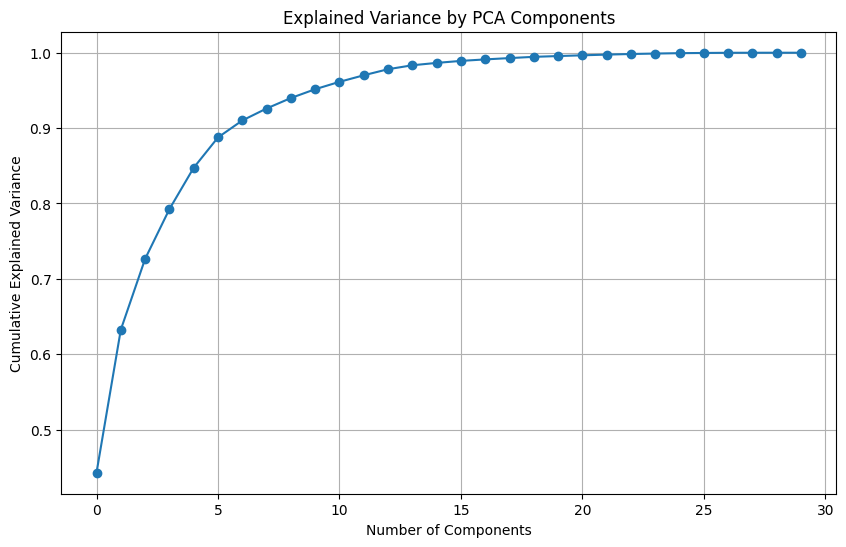

In [36]:
#plot cumulative explained variance
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.grid()
plt.show()

In [37]:
#decide number of components (keep 10 for 95% variance)
pca = PCA(n_components=10)
x_pca = pca.fit_transform(x_scaled)

In [39]:
#train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_pca, y,
                            test_size=0.3, random_state=42, stratify=y)

In [40]:
#train KNN classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean')

In [41]:
#evaluate accuracy
from sklearn.metrics import accuracy_score
y_pred = knn.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc}")

Accuracy: 0.9473684210526315
